In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import ords_prods_merge_new_columns

ords_prods_merge = pd.read_pickle(r'/Users/davidscheider/anaconda_projects/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_merge_new_columns.pkl')

In [8]:
# define path

path = r'/Users/davidscheider/anaconda_projects/Instacart Basket Analysis'

<Axes: xlabel='orders_day_of_week'>

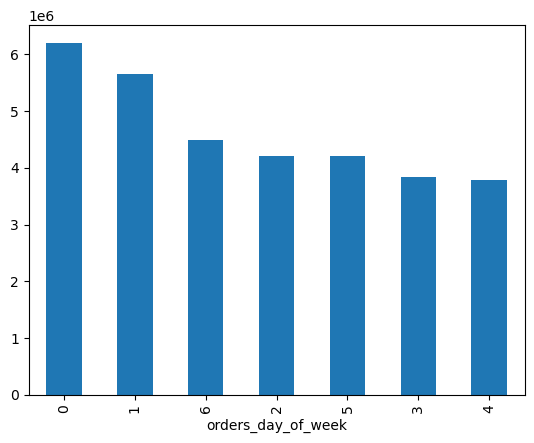

In [3]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

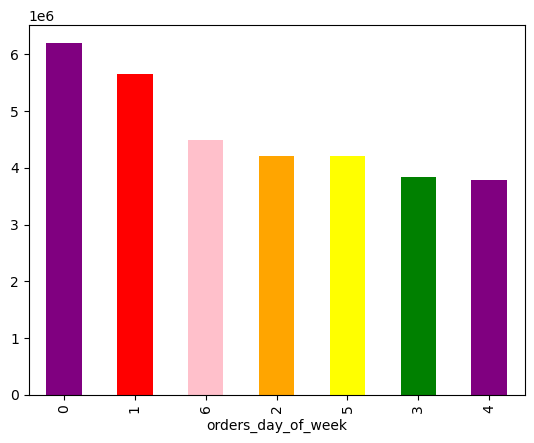

In [5]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

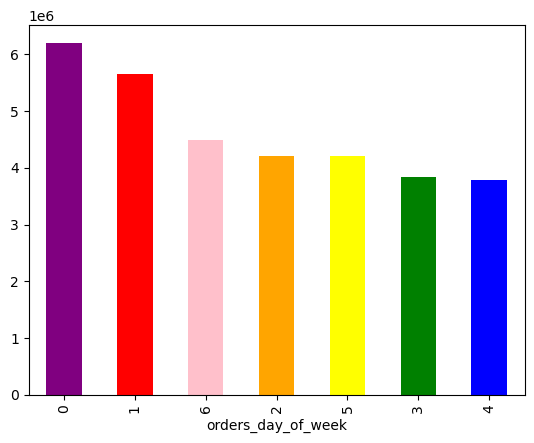

In [6]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [24]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

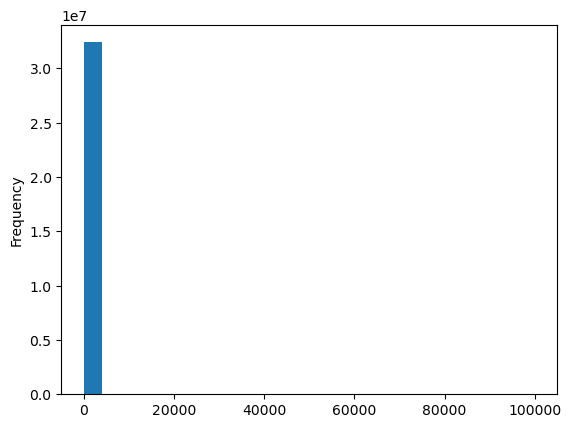

In [13]:
# create histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

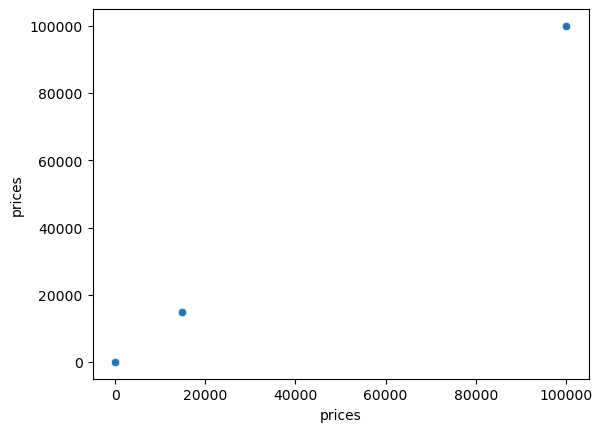

In [12]:
# create scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [15]:
# run background checks for outlier prices
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,Customer Type,order_frequency_flag
1576,171,912404,17,12,2,14,5.0,21553,5,0,...,High-range product,Busiest days,Regular day,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,181,603376,17,22,6,16,4.0,21553,3,1,...,High-range product,Busiest days,Regular day,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,1944,3264360,135,2,2,21,13.0,21553,6,0,...,High-range product,Busiest days,Regular day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,1945,892534,135,3,0,8,12.0,21553,3,1,...,High-range product,Busiest days,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53674,5708,229704,342,8,1,19,30.0,21553,9,0,...,High-range product,Busiest days,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32321686,3411856,3172853,205650,18,1,9,7.0,21553,17,1,...,High-range product,Busiest days,Busiest days,Average orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32348893,3414691,2504315,205818,3,5,15,3.0,21553,13,0,...,High-range product,Busiest days,Regular day,Average orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32348903,3414693,1108388,205818,5,4,5,1.0,21553,5,1,...,High-range product,Busiest days,Slowest days,Average orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32381705,3418470,1916142,206049,1,2,17,NaN,21553,2,0,...,High-range product,Busiest days,Regular day,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [16]:
# assign np.nan for values >100
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
# run check for max prices
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

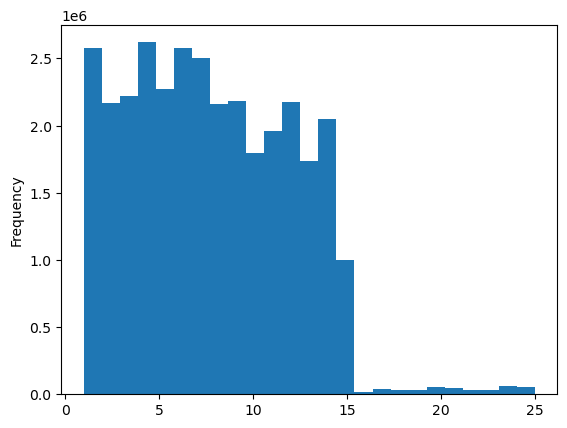

In [18]:
# recreate histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

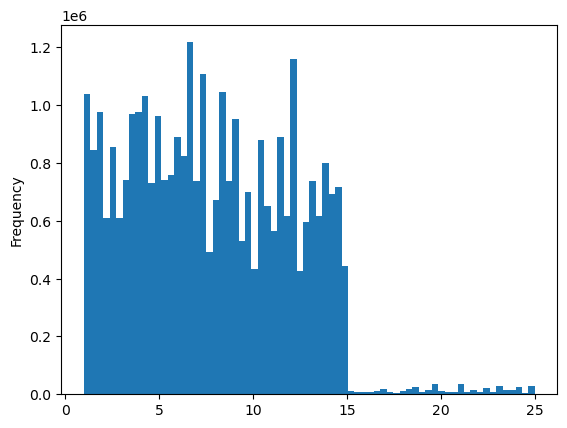

In [20]:
# recreate histogram with finer granularity
ords_prods_merge['prices'].plot.hist(bins = 70)

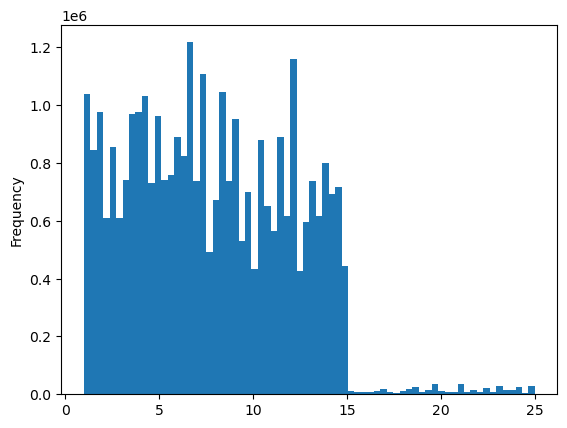

In [21]:
# export histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [23]:
# export histogram 
hist.figure.savefig(os.path.join(path, '04 Analysis', 'histogram_prices.png'))

In [29]:
# create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
# Store 70% of the samples in the dataframe big
big = ords_prods_merge[dev]

In [31]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [32]:
len(ords_prods_merge)

32406041

In [33]:
len(ords_prods_merge)

32406041

In [34]:
len(big) + len(small)

32406041

In [35]:
df_2 = small[['orders_day_of_week','prices']]

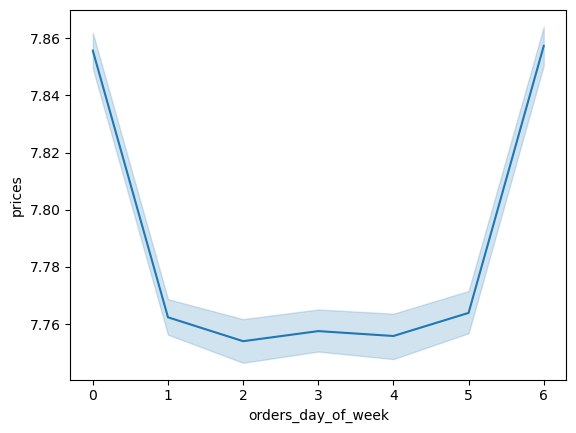

In [36]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')